In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

In [6]:
# Loading preprocessed data
X_train_scaled = np.load("data/X_train_scaled.npy")
X_test_scaled = np.load("data/X_test_scaled.npy")
y_train = np.load("data/y_train.npy")
y_test = np.load("data/y_test.npy")

In [8]:
# Logistic Regression model
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [10]:
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [12]:
print(classification_report(y_test, y_pred, target_names=["Background", "Signal"]))

              precision    recall  f1-score   support

  Background       0.99      0.95      0.97    107736
      Signal       0.91      0.99      0.95     55912

    accuracy                           0.96    163648
   macro avg       0.95      0.97      0.96    163648
weighted avg       0.96      0.96      0.96    163648



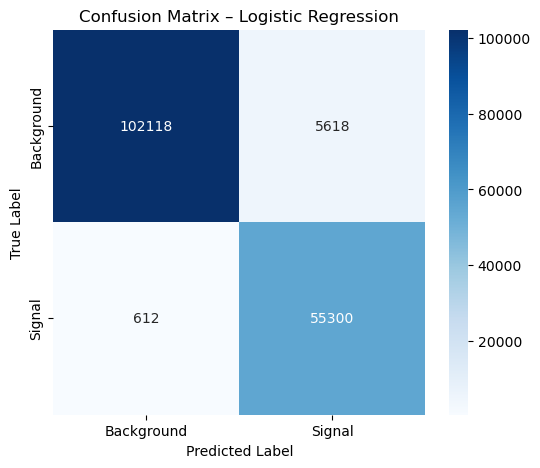

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Background", "Signal"],
            yticklabels=["Background", "Signal"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Logistic Regression")

plt.savefig("results/figures/lr_confusion_matrix.png", bbox_inches="tight")
plt.show()

In [16]:
roc_auc = roc_auc_score(y_test, y_proba)
roc_auc

0.9946096613231754

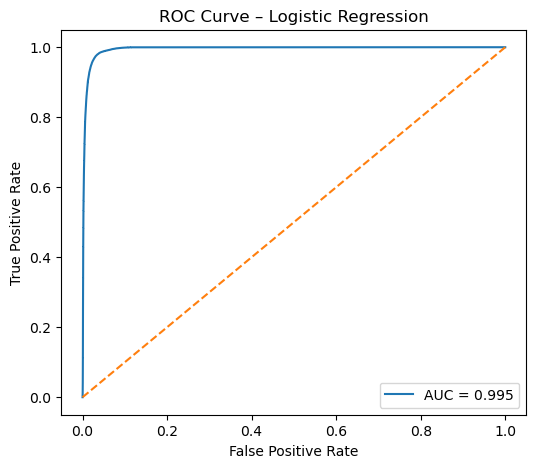

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()

plt.savefig("results/figures/lr_roc_curve.png", bbox_inches="tight")
plt.show()

In [20]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-score  : {f1:.4f}")

Accuracy  : 0.9619
Precision : 0.9078
Recall    : 0.9891
F1-score  : 0.9467


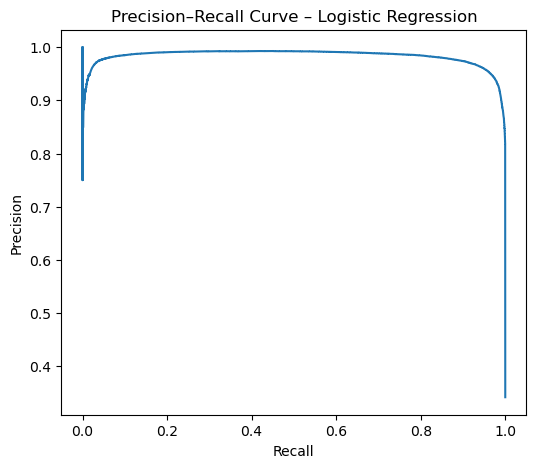

In [22]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Logistic Regression")

plt.savefig("results/figures/lr_pr_curve.png", bbox_inches="tight")
plt.show()

In [24]:
np.save("data/lr_probs.npy", y_proba)

In [26]:
lr_results = {
    "Model": "Logistic Regression",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1": f1,
    "ROC_AUC": roc_auc
}
lr_results

{'Model': 'Logistic Regression',
 'Accuracy': 0.9619304849432929,
 'Precision': 0.9077776683410487,
 'Recall': 0.9890542280726856,
 'F1': 0.9466746554823248,
 'ROC_AUC': 0.9946096613231754}